In [1]:
from rocket import Rocket
from stop import STOP
import pandas as pd
import pickle
from datetime import datetime
import numpy as np

In [2]:
import os
import re

In [3]:
f'Time: {str(datetime.now())}'

'Time: 2019-09-11 15:37:27.932030'

In [4]:
t_start = datetime.now()

In [5]:
t_end = datetime.now()

In [12]:
r = Rocket(disperse=True, alpha=0)
r.stop = STOP(r)

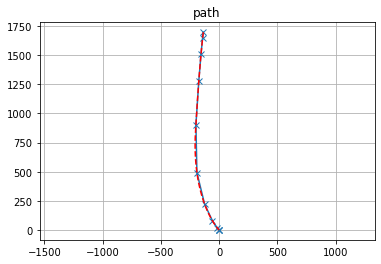

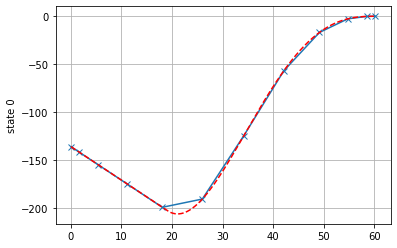

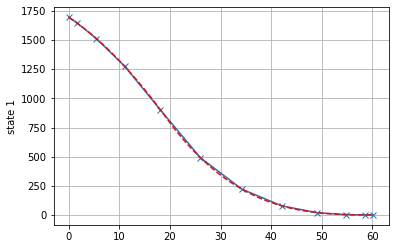

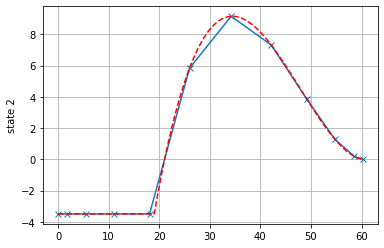

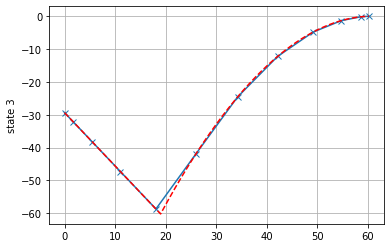

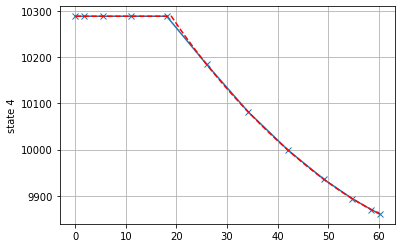

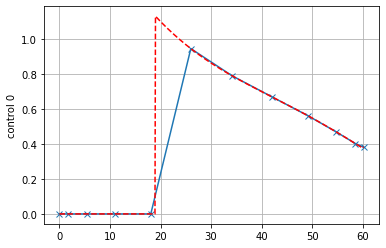

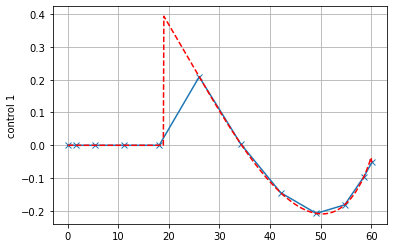

In [13]:
r.stop.plot_solution()

In [14]:


r.sol = r.stop.solve(mesh_refine=0, disp_plots=False)

********* Starting Solve ***********
---- iteration : 1 ----
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0
            Iterations: 7
            Function evaluations: 610
            Gradient evaluations: 7
Optimization terminated successfully.
Mesh Refine Count: 0
mf/m0   : 0.9563815310181235
tf/tchar: 1.9307938756318357

********* Solved Mesh iteration: 0 ***********
********* Solved! ***********


In [15]:
r.stop.prob.time

[array([ 0.        ,  1.65394009,  5.42463207, 11.01983355, 18.02407862,
        25.91780141, 34.11552871, 42.00925149, 49.01349657, 54.60869805,
        58.37939003, 60.03333012])]

In [16]:
r.stop.prob.controls(0,0)

array([5.76556296e-02, 2.29875020e-03, 2.51809275e-05, 5.52140741e-03,
       3.42195641e-01, 9.49714537e-01, 9.85092416e-01, 6.87258375e-01,
       5.88054718e-01, 5.09754453e-01, 4.28314678e-01, 3.85848285e-01])

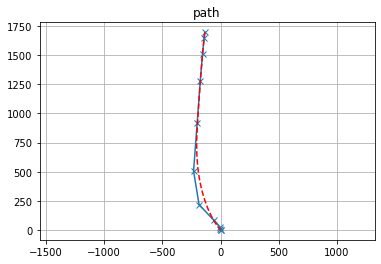

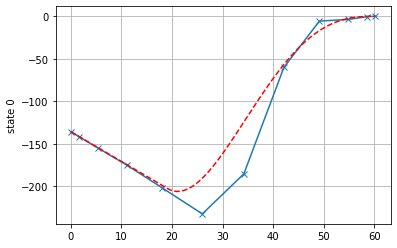

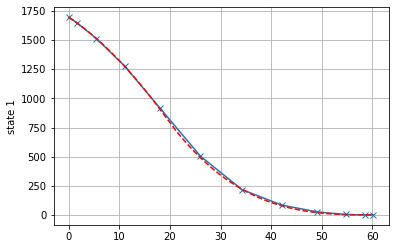

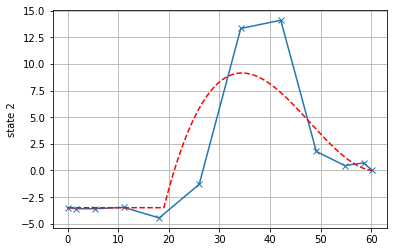

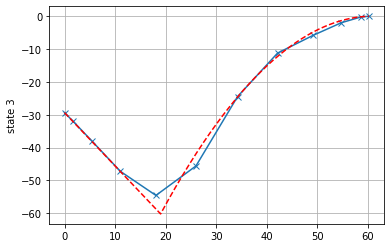

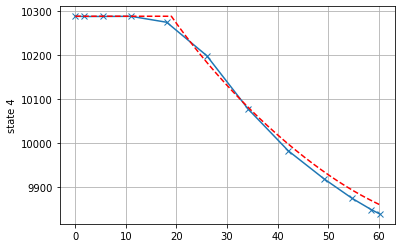

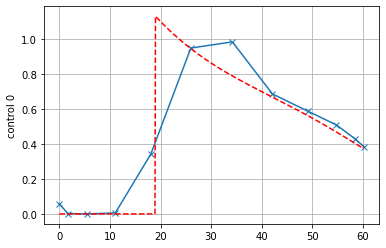

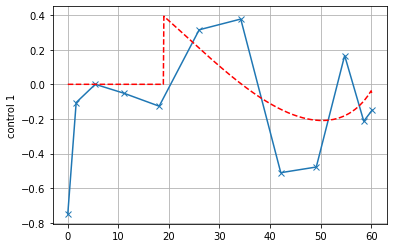

In [17]:
r.stop.plot_solution()

In [ ]:
path = 'data_alpha-1'

try:
    index = np.max([[int(s) for s in re.findall(r'\d+', d)] for d in os.listdir(path)])[0]
except:
    index = 0


for _ in range(1):
    try:
        index += 1
        print(f'******************** INDEX: {index} ***************')
        t_start = datetime.now()
        print(f'Time: {str(datetime.now())}')
        r = Rocket(disperse=True, alpha=1)
        r.stop = STOP(r)
        r.sol = r.stop.solve(mesh_refine=0, disp_plots=False)
        
        pickle.dump(r, open( f"{path}/{index}_sim_r.p", "wb" ) )

        df_s = pd.DataFrame(zip(*r.sol[1]))
        df_c = pd.DataFrame(zip(*r.sol[2]))

        path = f'{path}/{index}_sim_s.csv'
        df_s.to_csv(path)
        path = f'{path}/{index}_sim_c.csv'
        df_c.to_csv(path)
        
        r.t_compute = (datetime.now()-t_start).total_seconds()
        print('t_compute: {r.t_compute}')
                      
    except:
        pass


In [ ]:
timestamp = 1568185379.7574668
dt_object = datetime.fromtimestamp(timestamp)

In [ ]:
print(dt_object)

In [ ]:
timestamp = 1568180255.839802
dt_object = datetime.fromtimestamp(timestamp)
print(dt_object)

In [ ]:
#1.38 hours for 300 simulations

In [ ]:
datetime.now()

In [ ]:
r.stop.plot_solution()

In [ ]:
r.t_compute

In [ ]:
(datetime.now()-t_start).total_seconds()

In [ ]:
len(r.stop._og_equality(r.stop.prob, r))

In [ ]:
r.stop.prob